In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
muts = pd.read_csv('https://raw.githubusercontent.com/carli-werner/Brca1/main/ClinVar_Missense_Variants.csv')

In [3]:
# extract amino acid positions with pathogenic/likely pathogenic mutations
clin_sig = muts['Clinical Significance']
bools = clin_sig.str.contains('Pathogenic|pathogenic ')
pathogenic_positions = muts[bools]['Position']

In [4]:
# extract amino acid positions with benign/likely benign mutations
benign_bools = clin_sig.str.contains('Benign|benign ')
benign_positions = muts[benign_bools]['Position']

In [5]:
# extract conflicting/uncertain/not provided amino acid positions
na_positions = muts[(~bools) & (~benign_bools)]['Position']

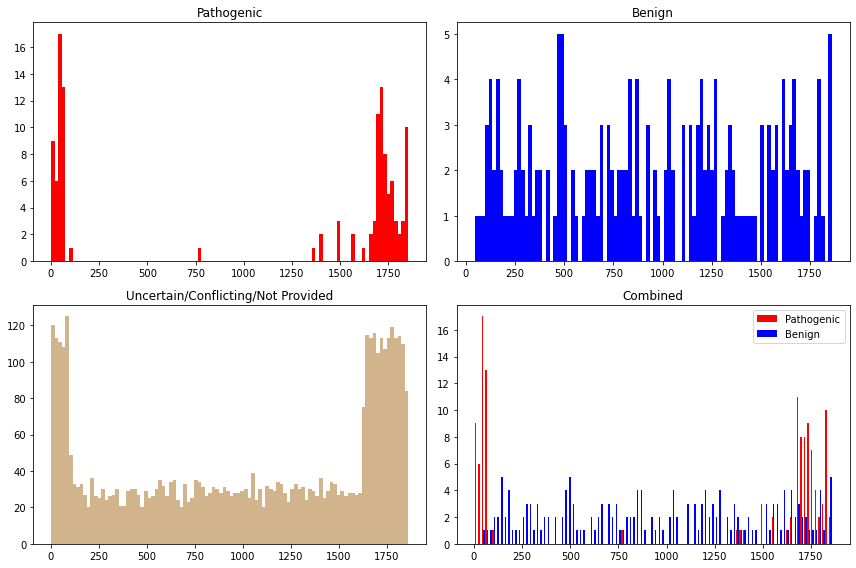

In [6]:
# Slide 21 visualization
n_bins = 100
x = [pathogenic_positions, benign_positions, na_positions]

# setup layout
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (12,8))

# top left
ax0.hist(x[0], n_bins, density= False, histtype='bar', color='red')
ax0.set_title('Pathogenic')

# top right
ax1.hist(x[1], n_bins, density= False, histtype='bar', color = 'blue')
ax1.set_title('Benign')

# bottom left
ax2.hist(x[2], n_bins, density= False, histtype='bar', color = 'tan')
ax2.set_title('Uncertain/Conflicting/Not Provided')

# bottom right
ax3.hist([x[0], x[1]], n_bins, density = False, histtype='bar', color = ['red', 'blue'], label = ['Pathogenic', 'Benign'])
ax3.set_title('Combined')

# finishing layout touches 
ax3.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

In [7]:
pathogenic_muts = muts[bools] # all pathogenic mutations
benign_muts = muts[benign_bools] # all benign mutations

In [8]:
# RING domain -------------------------------------------------------------------------
# all ring mutations
ring = muts[(muts["Position"] <= 64) & (muts["Position"] >= 24)]
# isolate pathogenic RING mutations
ring_pathogenic = pathogenic_muts[(pathogenic_muts["Position"] <= 64) & (pathogenic_muts["Position"] >= 24)]
# isolate benign RING mutations
ring_benign = benign_muts[(benign_muts['Position'] >= 24) & (benign_muts['Position'] <= 64)]

In [9]:
# count the number of benign mutations at each aa position
counts_b = dict()
pb = ring_benign['Position'].to_list()
for pos in pb:
    if pos not in counts_b.keys():
        counts_b[pos] = 1
    else:
        count = counts_b[pos] + 1
        count_b[pos] = count

In [10]:
# count the number of pathogenic mutations at each aa position
counts_p = dict()
pp = ring_pathogenic['Position'].to_list()
for pos in pp:
    if pos not in counts_p.keys():
        counts_p[pos] = 1
    else:
        count = counts_p[pos] + 1
        counts_p[pos] = count

In [11]:
# Set the heights of positions with no reported pathogenic or benign mutations
for pos in ring['Position']:
    if pos not in counts_b:
        counts_b[pos] = 0
    if pos not in counts_p:
        counts_p[pos] = 0

In [12]:
ring_p_heights = list()
ring_b_heights = list()
for i in range(24, 65):
    ring_p_heights.append(counts_p[i])
    ring_b_heights.append(counts_b[i])

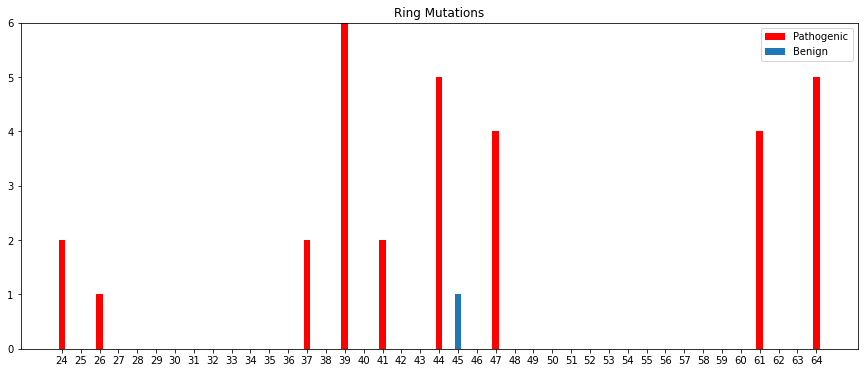

In [13]:
# Slide 7 visualization
labels = range(24, 65)
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 6))

ax.bar(labels, ring_p_heights, width, label= "Pathogenic", color = 'red', tick_label = range(24, 65))
ax.bar(labels, ring_b_heights, width, label = 'Benign', bottom=ring_p_heights)
ax.set_title('Ring Mutations')
ax.legend()
plt.show()

In [14]:
# Serine Rich Domain ---------------------------------------------------------------------

In [15]:
# benign serine rich mutations
sr_benign = benign_muts[(benign_muts["Position"] >= 345) & (benign_muts["Position"] <= 507)]
sr_b_counts = dict()
# count the benign mutations at each position
for pos in sr_benign['Position']:
    if pos in sr_b_counts.keys():
        sr_b_counts[pos] = sr_b_counts[pos] + 1
    else:
        sr_b_counts[pos] = 1

In [16]:
# pathogenic serine rich mutations
# Note: there are no pathogenic mutations in this domain
sr_pathogenic = pathogenic_muts[(pathogenic_muts['Position'] >= 345) & (pathogenic_muts['Position'] <= 507)]
sr_b_heights = list()
for i in range(345, 508):
    if i in sr_b_counts.keys():
        sr_b_heights.append(sr_b_counts[i])
    else:
        sr_b_heights.append(0)

In [17]:
# Set the heights of positions with no reported pathogenic or benign mutations
sr_b_heights = list()
for i in range(345, 508):
    if i in sr_b_counts.keys():
        sr_b_heights.append(sr_b_counts[i])
    else:
        sr_b_heights.append(0)

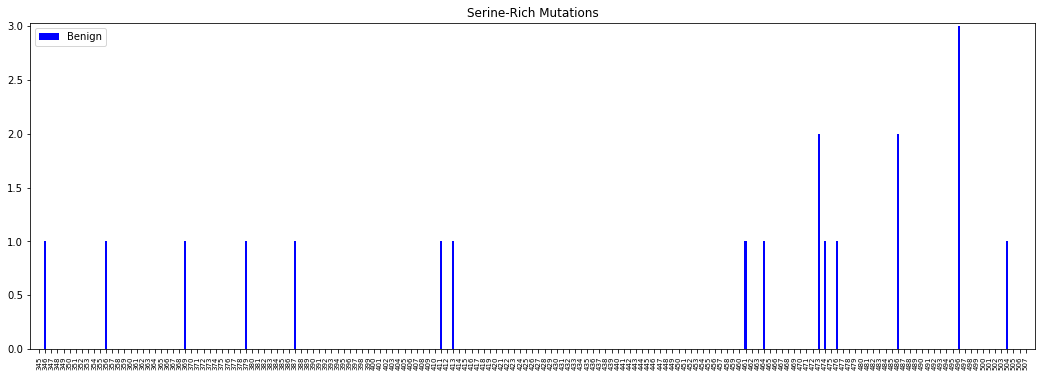

In [18]:
# Slide 10 visualization
width = 0.35 
labels = range(345, 508)

fig, ax = plt.subplots(figsize = (18, 6))
plt.xticks(rotation = 90, fontsize = 7)
plt.margins(x = 0.008, y = 0.008)

ax.bar(labels, sr_b_heights, width, label= "Benign", color = 'blue', tick_label = labels)
ax.set_title('Serine-Rich Mutations')
ax.legend()
plt.show()

In [19]:
# BRCT Domains ----------------------------------------------------------------

In [20]:
# benign brct mutations
brct_benign = benign_muts[(benign_muts['Position'] >= 1643) & (benign_muts['Position'] <= 1842)]
# pathogenic brct mutations
brct_pathogenic = pathogenic_muts[(pathogenic_muts['Position'] >= 1643) & (pathogenic_muts['Position'] <= 1842)]


In [21]:
# count the benign mutations at each position
brct_b_counts = dict()
pos = brct_benign['Position'].to_list()
for t in pos:
    if t not in brct_b_counts.keys():
        brct_b_counts[t] = 1
    else:
        count = brct_b_counts[t] + 1
        brct_b_counts[t] = count

In [22]:
# count the pathogenic mutations at each position
brct_p_counts = dict()
pos = brct_pathogenic['Position'].to_list()
for t in pos:
    if t not in brct_p_counts.keys():
        brct_p_counts[t] = 1
    else:
        count = brct_p_counts[t] + 1
        brct_p_counts[t] = count

In [23]:
# Set the heights of positions with no reported pathogenic or benign mutations
brct_b_heights = list()
for i in range(1643, 1843):
    if i in brct_b_counts.keys():
        brct_b_heights.append(brct_b_counts[i])
    else:
        brct_b_heights.append(0)
    

In [24]:
# Set the heights of positions with no reported pathogenic or benign mutations
brct_p_heights = list()
for i in range(1643, 1843):
    if i in brct_p_counts.keys():
        brct_p_heights.append(brct_p_counts[i])
    else:
        brct_p_heights.append(0)



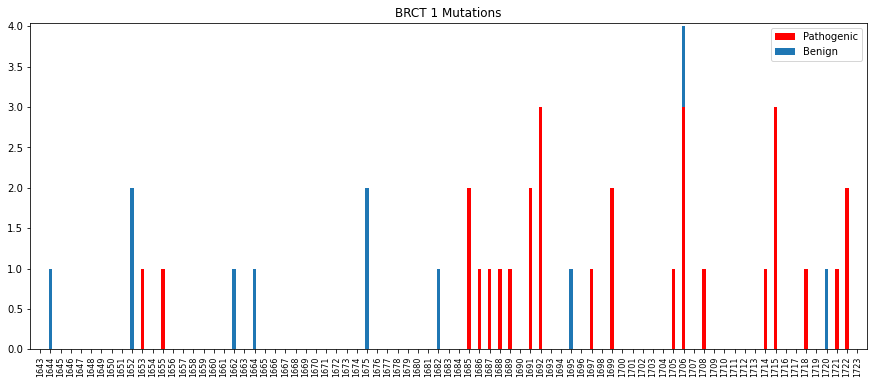

In [25]:
# BRCT 1
# Slide 15 
width = 0.35 
labels = range(1643, 1724)

fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(rotation = 90, fontsize = 8)
plt.margins(x = 0.01, y = 0.01)

# only take BRCT 1 region
ax.bar(labels, brct_p_heights[0:81], width, label= "Pathogenic", color = 'red', tick_label = labels)
ax.bar(labels, brct_b_heights[0:81], width, label = 'Benign', bottom= brct_p_heights[0:81])
ax.set_title('BRCT 1 Mutations')
ax.legend()
plt.show()

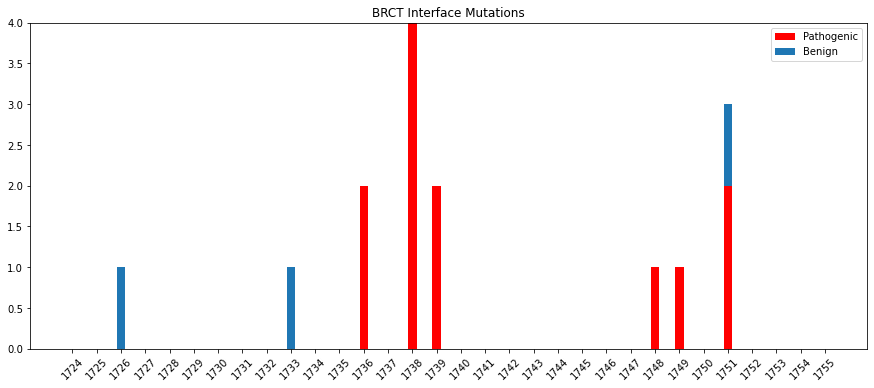

In [26]:
# Area between BRCT domains
# Slide 17 mutations
width = 0.35 
labels = range(1724, 1756)

fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(rotation = 45)

# only take area between BRCT 1 and BRCT 2
ax.bar(labels, brct_p_heights[81:113], width, label= "Pathogenic", color = 'red', tick_label = labels)
ax.bar(labels, brct_b_heights[81:113], width, label = 'Benign', bottom= brct_p_heights[81:113])
ax.set_title('BRCT Interface Mutations')
ax.legend()
plt.show()

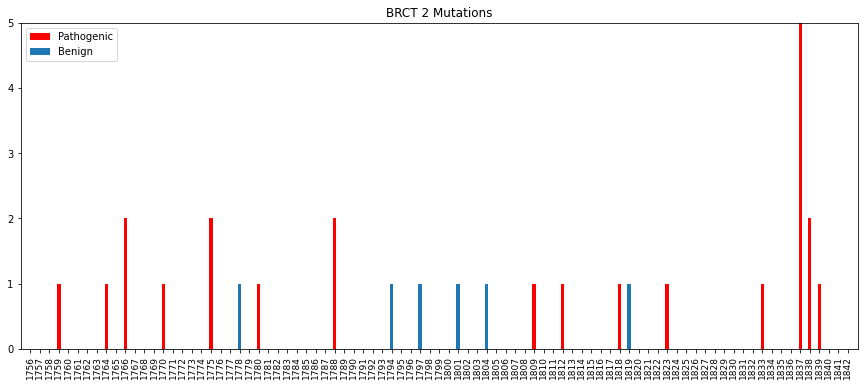

In [27]:
# BRCT 2
# Slide 19
width = 0.35 
labels = range(1756, 1843)

fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(rotation = 90, fontsize = 9)

# only take BRCT 2
ax.bar(labels, brct_p_heights[113:200], width, label= "Pathogenic", color = 'red', tick_label = labels)
ax.bar(labels, brct_b_heights[113:200], width, label = 'Benign', bottom= brct_p_heights[113:200])
ax.set_title('BRCT 2 Mutations')
ax.legend()
plt.margins(x = 0.01, y = 0.01)
plt.show()